In [ ]:
#데이터셋
import pandas as pd
import numpy as np

fillna_final_df = pd.read_csv("/content/drive/MyDrive/물공모전/fillna_final_df (1).csv")
time_final_df = pd.read_csv("/content/drive/MyDrive/물공모전/time_final_df (1).csv")
test_df = pd.read_csv("/content/drive/MyDrive/물공모전/test (1).csv")
test_2023 = pd.read_csv("/content/drive/MyDrive/물공모전/OBS_ASOS_DD_20230815131320.csv", encoding='euc-kr')

## test data의 최종 y값 생성

In [ ]:
tmp_test = pd.merge(test_df, test_2023, how='inner', on='일시')

tmp_test['일강수량(mm)'] = tmp_test['일강수량(mm)'].fillna(0)
tmp_test['최종 y'] = 0
tmp_test['최종 y'] = tmp_test['1회관개량'] - tmp_test['일강수량(mm)']

tmp_test['최종 y'] = np.where(tmp_test['최종 y'] < 0, 0, tmp_test['최종 y']) #최종 y값이 음수면 0으로

test_fin = tmp_test[['평균기온(°C)_x', '평균 상대습도(%)_x', '합계 일조시간(hr)_x', '합계 일사량(MJ/m2)_x',
       '평균 지면온도(°C)_x', '합계 대형증발량(mm)_x', '20CM 일 토양수분(%)', '토성', '작물이름', '생육단계', '최종 y']]

test_fin.tail()

,평균기온(°C)_x,평균 상대습도(%)_x,합계 일조시간(hr)_x,합계 일사량(MJ/m2)_x,평균 지면온도(°C)_x,합계 대형증발량(mm)_x,20CM 일 토양수분(%),토성,작물이름,생육단계,최종 y
1267,27.495195,76.978744,6.481663,16.951133,31.106817,3.047698,24.944278,3,5,4,59.49
1268,27.495195,76.978744,6.481663,16.951133,31.106817,3.047698,24.944278,1,5,4,38.54
1269,27.495195,76.978744,6.481663,16.951133,31.106817,3.047698,24.944278,5,5,4,40.22
1270,27.495195,76.978744,6.481663,16.951133,31.106817,3.047698,24.944278,7,5,4,48.65
1271,27.495195,76.978744,6.481663,16.951133,31.106817,3.047698,24.944278,2,5,4,49.86


## train / test set 설정

In [ ]:
# 결측치 0 대체 시 train
x_train_0 = fillna_final_df[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)', '토성', '작물이름', '생육단계']]
x_train_0 = pd.get_dummies(data= x_train_0, columns=['토성', '작물이름'])

y_train_0 = fillna_final_df['최종y']

In [ ]:
# 결측치 선형 보간 시 train
x_train_i = time_final_df[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)', '토성', '작물이름', '생육단계']]
x_train_i = pd.get_dummies(data= x_train_i, columns=['토성', '작물이름'])

y_train_i = time_final_df['최종y']

In [ ]:
#test
x_test = test_fin[['평균기온(°C)_x', '평균 상대습도(%)_x', '합계 일조시간(hr)_x', '합계 일사량(MJ/m2)_x',
       '평균 지면온도(°C)_x', '합계 대형증발량(mm)_x', '20CM 일 토양수분(%)', '토성', '작물이름', '생육단계']]

x_test.columns = ['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)', '토성', '작물이름', '생육단계']

x_test = pd.get_dummies(data= x_test, columns=['토성', '작물이름'])
x_test['작물이름_1'] = 0
x_test['작물이름_2'] = 0
x_test['작물이름_3'] = 0
x_test['작물이름_4'] = 0
x_test['작물이름_7'] = 0
x_test['작물이름_8'] = 0
x_test['작물이름_9'] = 0
x_test['작물이름_10'] = 0
x_test['작물이름_11'] = 0
x_test['작물이름_12'] = 0

x_test = x_test[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)',
       '합계 대형증발량(mm)', '20CM 일 토양수분(%)', '생육단계', '토성_1', '토성_2', '토성_3',
       '토성_4', '토성_5', '토성_7', '작물이름_1', '작물이름_2', '작물이름_3', '작물이름_4',
       '작물이름_5', '작물이름_6', '작물이름_7', '작물이름_8', '작물이름_9', '작물이름_10', '작물이름_11',
       '작물이름_12']]

y_test = test_fin['최종 y']

## Standard_scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#결측치 0 대체 시
scaler_0 = StandardScaler()

X_scaled_0 = x_train_0
X_scaled_0[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']] = scaler_0.fit_transform(x_train_0[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']])

#해당 fit으로 test데이터도 transform 해줍니다
X_test_0 = x_test
X_test_0[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']] = scaler_0.transform(x_test[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']])

In [ ]:
#결측치 선형보간 대체 시
scaler_i = StandardScaler()

X_scaled_i = x_train_i
X_scaled_i[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']] = scaler_i.fit_transform(x_train_i[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']])

#해당 fit으로 test데이터도 transform 해줍니다
X_test_i = x_test
X_test_i[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']] = scaler_i.transform(x_test[['평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)',
       '평균 지면온도(°C)', '합계 대형증발량(mm)', '20CM 일 토양수분(%)']])

## 결측 0 대체 linear 모델

In [ ]:
from sklearn.linear_model import LinearRegression
reg_0 = LinearRegression().fit(X_scaled_0, y_train_0)

reg_pred_0 = reg_0.predict(X_test_0)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(reg_pred_0, y_test)

6.208510757542256

<Axes: >

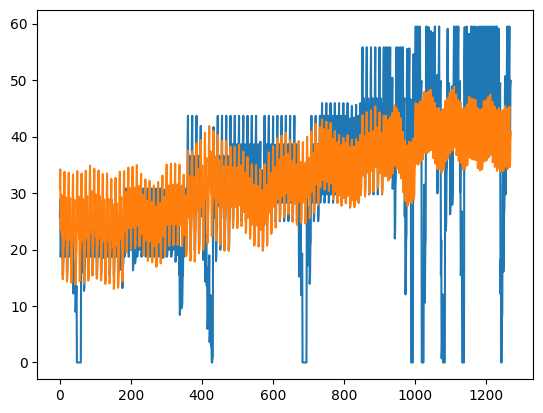

In [ ]:
pd.Series(reg_pred_0).plot()

## 결측 선형보간 linear 모델

In [ ]:
reg_i = LinearRegression().fit(X_scaled_i, y_train_i)
reg_pred_i = reg_i.predict(X_test_i)

mean_absolute_error(reg_pred_i, y_test)

6.861042918079304

In [ ]:
reg_pred_i

array([27.7434082 , 30.94702148, 20.43066406, ..., 36.39526367,
       40.6262207 , 41.70922852])

<Axes: >

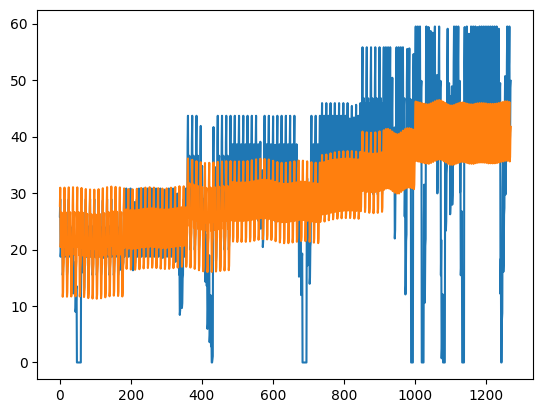

In [ ]:
y_test.plot()
pd.Series(reg_pred_i).plot()

단순 회귀 모델의 경우, 결측치를 0으로 대체했을 때의 예측 성능이 더 좋았다.

## 결측 0 대체 xgboost 모델 + 그리드서치 진행

In [ ]:
import xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_model= xgboost.XGBRegressor()
params = {'max_depth': [3, 4, 5], 'learning_rate' : [0.01, 0.025, 0.05], 'gamma' : [0], 'n_estimators': [200], 'subsample': [0.75]}

grid_search= GridSearchCV(xgb_model, params, cv=5)
grid_search.fit(X_scaled_0, y_train_0)
print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}


In [ ]:
xgb_model_0 = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.05, gamma=0, subsample=0.75, max_depth=5)
xgb_model_0.fit(X_scaled_0, y_train_0)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred_0 = xgb_model_0.predict(X_test_0)

In [ ]:
pred_0

array([24.599709, 27.458944, 18.18836 , ..., 35.02614 , 42.075657,
       43.821293], dtype=float32)

In [ ]:
mean_absolute_error(pred_0, y_test)

4.575274701088479

<Axes: >

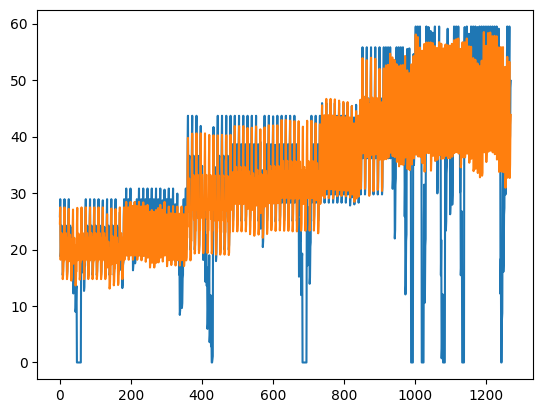

In [ ]:
y_test.plot()
pd.Series(pred_0).plot()

## 결측 선형 보간 모델 + 그리드서치

In [ ]:
import xgboost

In [ ]:
xgb_model_i = xgboost.XGBRegressor()
params = {'max_depth': [3, 4, 5], 'learning_rate' : [0.01, 0.025, 0.05], 'gamma' : [0], 'n_estimators': [200], 'subsample': [0.75]}

grid_search_i = GridSearchCV(xgb_model_i , params, cv=5)
grid_search_i.fit(X_scaled_i, y_train_i)
print(grid_search_i.best_params_)

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}


In [ ]:
xgb_model_i = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.05, gamma=0, subsample=0.75, max_depth=5)
xgb_model_i.fit(X_scaled_i, y_train_i)
pred_i = xgb_model_i.predict(X_test_i)

In [ ]:
mean_absolute_error(pred_i, y_test)

7.240147391220309

<Axes: >

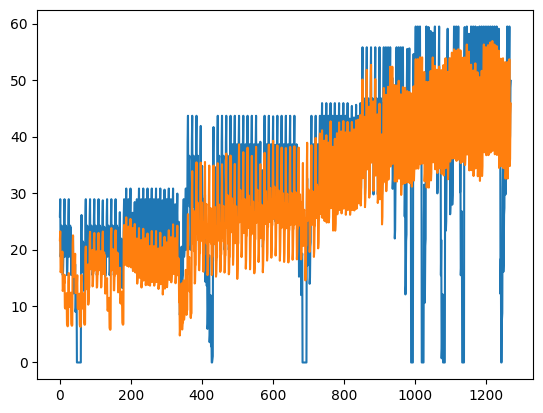

In [ ]:
y_test.plot()
pd.Series(pred_i).plot()

## 파이캐럿 이용

파이캐럿을 이용해 xgboost 모델 사용의 정당성 부여

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 41.6 MB/s eta 0:0

In [ ]:
from pycaret import regression
regression.setup(data=X_scaled_0,target=y_train_0,remove_outliers=True)

,Description,Value
0,Session id,1393
1,Target,최종y
2,Target type,Regression
3,Original data shape,"(12348, 27)"
4,Transformed data shape,"(11915, 27)"
5,Transformed train set shape,"(8210, 27)"
6,Transformed test set shape,"(3705, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best=regression.compare_models(n_select=3,fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1.5890,6.8319,2.6087,0.9636,0.4377,0.1806,1.6200
lightgbm,Light Gradient Boosting Machine,2.1413,11.2849,3.3512,0.9398,0.5004,0.3443,1.4620
rf,Random Forest Regressor,2.3473,16.6716,4.0741,0.9111,0.4480,0.2911,3.9800
et,Extra Trees Regressor,2.4567,18.1022,4.2463,0.9035,0.4849,0.2455,2.9840
dt,Decision Tree Regressor,2.8836,34.8313,5.8819,0.8143,0.4947,0.2414,0.1240
gbr,Gradient Boosting Regressor,4.4138,48.6982,6.9737,0.7405,0.7650,0.6262,1.6380
knn,K Neighbors Regressor,4.8894,58.8799,7.6714,0.6858,0.8139,0.6454,0.1520
lr,Linear Regression,6.3226,80.1772,8.9516,0.5726,0.9118,0.7119,3.4200
ridge,Ridge Regression,6.3228,80.1805,8.9518,0.5726,0.9118,0.7119,0.0760
br,Bayesian Ridge,6.3235,80.1920,8.9524,0.5725,0.9119,0.7119,0.0760


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
best

[XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=1393, ...),
 LGBMRegressor(n_jobs=-1, random_state=1393),
 RandomForestRegressor(n_jobs=-1, random_state=1393)]

In [ ]:
top1 = regression.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4601,5.8320,2.4150,0.9675,0.4203,0.1828
1,1.4123,4.6505,2.1565,0.9742,0.3993,0.1326
2,1.4562,5.1071,2.2599,0.9721,0.4232,0.1112
3,1.4500,4.8946,2.2124,0.9724,0.4703,0.1114
4,1.6531,7.0906,2.6628,0.9621,0.5057,0.1769
5,1.5450,10.2417,3.2003,0.9464,0.4511,0.1019
6,1.6997,8.3752,2.8940,0.9612,0.4816,0.1976
7,1.4696,5.0893,2.2560,0.9737,0.4115,0.0960
8,1.3965,4.5776,2.1395,0.9747,0.4038,0.6007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgb = regression.tune_model(top1, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5085,24.6883,4.9687,0.8626,0.6144,0.3573
1,3.4653,24.9179,4.9918,0.8618,0.5893,0.2417
2,3.4764,25.1672,5.0167,0.8624,0.6333,0.2571
3,3.8212,32.6920,5.7177,0.8156,0.6805,0.2739
4,3.7687,33.3586,5.7757,0.8215,0.6693,0.3194
5,3.7737,29.8552,5.4640,0.8438,0.6648,0.2512
6,4.1228,36.1041,6.0087,0.8327,0.6980,0.3896
7,3.4846,25.6485,5.0644,0.8674,0.5627,0.2125
8,3.5139,28.2762,5.3175,0.8437,0.6252,1.2654


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## 향후 활용 방법

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (10,10)


geo_file = '/content/drive/MyDrive/공모전/물공모전/shp/44.shp'
geo = gpd.read_file(geo_file)

In [3]:
geo.columns

Index(['CTPRV_CD', 'SGNG_CD', 'EMNDN_CD', 'CMBLC_ID', 'SBLT_ID', 'SMAR_NO',
       'SLTP_CD', 'STQLT_CD', 'MPDMR_NO', 'STNDA_NMPL', 'MPDMR_NM',
       'FLGHT_PHTG', 'EXMNE_NM', 'EXMNN_AREA', 'RHGLT_GGRP', 'WTHR_CD',
       'TPGRP_TPCD', 'CLZN_CD', 'PRRCK_LARG', 'SOIL_DRNGE', 'LOCTN_GRDN',
       'ALTTD_CD', 'ACCMA_FOR', 'WASH_CD', 'SLANT_TYP', 'EIGHT_CD',
       'ROCK_EXDGR', 'RIDGE_VS', 'WIND_EXDGR', 'WTEFF_DGR', 'VLDTY_SLDP',
       'SIAFLR_STP', 'SIBFLR_STP', 'SIAFLR_SLD', 'SIBFLR_SLD', 'SIAFLR_ERC',
       'SIBFLR_ERC', 'SIAFLR_ORM', 'SIBFLR_ORM', 'SIAFLR_SCS', 'SIBFLR_SCS',
       'SIAFLR_CBS', 'SIBFLR_CBS', 'SIAFLR_STR', 'SIBFLR_STR', 'SIAFLR_HGD',
       'SIBFLR_HGD', 'SIAFLR_CNS', 'SIBFLR_CNS', 'SIAFLR_HYP', 'SIAFLR_HER',
       'SIBFLR_HER', 'SIAFLR_SMA', 'SIBFLR_SMA', 'SIAFLR_MDD', 'SIBFLR_MDD',
       'SIAFLR_LAR', 'SIBFLR_LAR', 'KOFTR_CD', 'TREEHT1', 'TREEHT2', 'TREEHT3',
       'TREEHT4', 'TREEHT5', 'FRAG1', 'FRAG2', 'FRAG3', 'FRAG4', 'FRAG5',
       'REAL_STIND', 'INTGR_T

In [4]:
geo = geo[['CTPRV_CD' ,'SGNG_CD' ,'EMNDN_CD' ,'SMAR_NO' , 'MPDMR_NO','STNDA_NMPL','EXMNN_AREA','WTHR_CD','SIAFLR_SCS','SIBFLR_SCS']]

In [5]:
geo.columns = ['시도코드','시군구코드','읍면동코드','표준지번호' , '도엽번호','표준지명','조사면적','날씨코드','토양A층토성코드','토양B층토성코드']

시도코드

In [6]:
print(geo['시도코드'].unique())
sido = {'44':'충청남도','30':'대전광역시','45':'전라북도','43':'충청북도','41':'경기도'}
geo['시도코드'] = geo['시도코드'].replace(sido)

['44' '30' '45' '43' '41']


시군구코드

In [7]:
print(geo['시군구코드'].unique())
sigungu={'44825':'태안군', '44210':'서산시', '44180':'보령시', '44790':'청양군', '44800':'홍성군', '44810':'예산군', '44770':'서천군',
       '44150':'공주시', '30170':'서구', '44230':'논산시', '30200':'유성구', '44710':'금산군', '44730':'연기군', '44760':'부여군',
       '45140':'익산시', '45710':'완주군', '43730':'옥천군', '43740':'영동군', '30110':'동구', '30140':'중구', '45720':'진안군',
       '45730':'무주군', '41860':'41860', '43710':'청원군', '43750':'진천군', '44830':'당진군', '44130':'천안시', '44200':'아산시'}
geo['시군구코드'] = geo['시군구코드'].replace(sigungu)

['44825' '44210' '44180' '44790' '44800' '44810' '44770' '44150' '30170'
 '44230' '30200' '44710' '44730' '44760' '45140' '45710' '43730' '43740'
 '30110' '30140' '45720' '45730' '41860' '43710' '43750' '44830' '44130'
 '44200']


읍면동코드

In [8]:
print(geo.loc[geo['시군구코드']=='서산시','읍면동코드'].unique())
seosan = {'44210250':'대산읍', '44210320':'부석면', '44210330':'팔봉면', '44210340':'지곡면', '44210101':'읍내동',
       '44210102':'동문동', '44210103':'갈산동', '44210104':'온석동', '44210106':'수석동', '44210110':'죽성동',
       '44210111':'양대동', '44210112':'오남동', '44210113':'장동', '44210114':'덕지천동', '44210310':'인지면',
       '44210360':'성연면', '44210370':'음암면', '44210380':'운산면', '44210390':'해미면', '44210400':'고북면'}
geo['읍면동코드'] = geo['읍면동코드'].replace(seosan)

['44210250' '44210320' '44210330' '44210340' '44210101' '44210102'
 '44210103' '44210104' '44210106' '44210110' '44210111' '44210112'
 '44210113' '44210114' '44210310' '44210360' '44210370' '44210380'
 '44210390' '44210400']


In [9]:
seosan_df = geo.loc[geo['시군구코드']=='서산시',:]
doyeop = {'366021':'고파', '366022':'대산', '366023':'태안', '366024':'서산', '366061':'달산', '366062':'부석',
       '366033':'운산', '366071':'해미', '376144':'난지', '366034':'면천', '366072':'덕산'}

seosan_df['도엽번호'] = seosan_df['도엽번호'].replace(doyeop)

<ipython-input-9-76ff4d67526f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seosan_df['도엽번호'] = seosan_df['도엽번호'].replace(doyeop)


In [10]:
seosan_df[['시군구코드', '읍면동코드','토양A층토성코드','도엽번호', '표준지명', '조사면적',]]

,시군구코드,읍면동코드,토양A층토성코드,도엽번호,표준지명,조사면적
132,서산시,대산읍,02,고파,대산,17603.103487
133,서산시,대산읍,02,고파,대산,28588.300355
134,서산시,대산읍,02,고파,대산,48334.275329
135,서산시,대산읍,01,고파,대산,370175.923130
136,서산시,대산읍,02,고파,대산,176780.210178
...,...,...,...,...,...,...
23430,서산시,운산면,03,운산,운산면,175742.439668
23431,서산시,운산면,03,운산,운산면,175742.439668
23432,서산시,운산면,01,운산,운산면,79200.358063
23433,서산시,운산면,01,운산,운산면,79200.358063


In [11]:
soiltonum = {'사양토':'01' ,'양토':'02' ,'미사질양토':'03' ,'미사질식양토':'04',
'사질식양토':'05','미사질식토':'06' ,'식양토':'07' ,'미사':'08','양질사토':'09' ,'사토':'10','점토':'11'}
numtosoil ={'01' : '사양토','02' : '양토','03' : '미사질양토','04' : '미사질식양토',
'05' : '사질식양토','06' : '미사질식토','07' : '식양토','08' : '미사','09' : '양질사토','10' : '사토','11' : '점토'}

seosan_df['토양A층토성코드'] = seosan_df['토양A층토성코드'].replace(numtosoil)
seosan_df['토양B층토성코드'] = seosan_df['토양B층토성코드'].replace(numtosoil)

<ipython-input-11-49df1427cad0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seosan_df['토양A층토성코드'] = seosan_df['토양A층토성코드'].replace(numtosoil)
<ipython-input-11-49df1427cad0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seosan_df['토양B층토성코드'] = seosan_df['토양B층토성코드'].replace(numtosoil)


A층 - 용탈층
기후나 식생 등의 영향을 받아 가용성염기류가 용탈

B층 - 집적층
풍화작용이 가장 활발하게 진행되고 있는 층
A층에서 용탈되는 이화확적 성분들이 B층에서 침전 또는 집적이 이루어지는 층